##  Importación de librerías para iniciar el ETL (pandas,numpy,matplotlib,seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt

Tuve que instalar openpyxl para leer el archivo 'lesiones.xlsx' porque me daba problemas a la hora de leer ese archivo. Utilizamos también sheet_names para poder leer las pestañas de nuestro Excel

In [39]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [40]:

df1 = pd.read_excel('C:/Users/User/OneDrive/Escritorio/Proyecto Final Accidente Vial/Datasets/homicidios.xlsx',sheet_name='HECHOS')

df2 = pd.read_excel('C:/Users/User/OneDrive/Escritorio/Proyecto Final Accidente Vial/Datasets/homicidios.xlsx',sheet_name='VICTIMAS')




Utilizamos la librería de Missigno para visualizar la cantidad de nulos que hay en las columnas

In [41]:
import missingno as msno


## Vamos a realizar el proceso de ETL de df1

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

<Axes: >

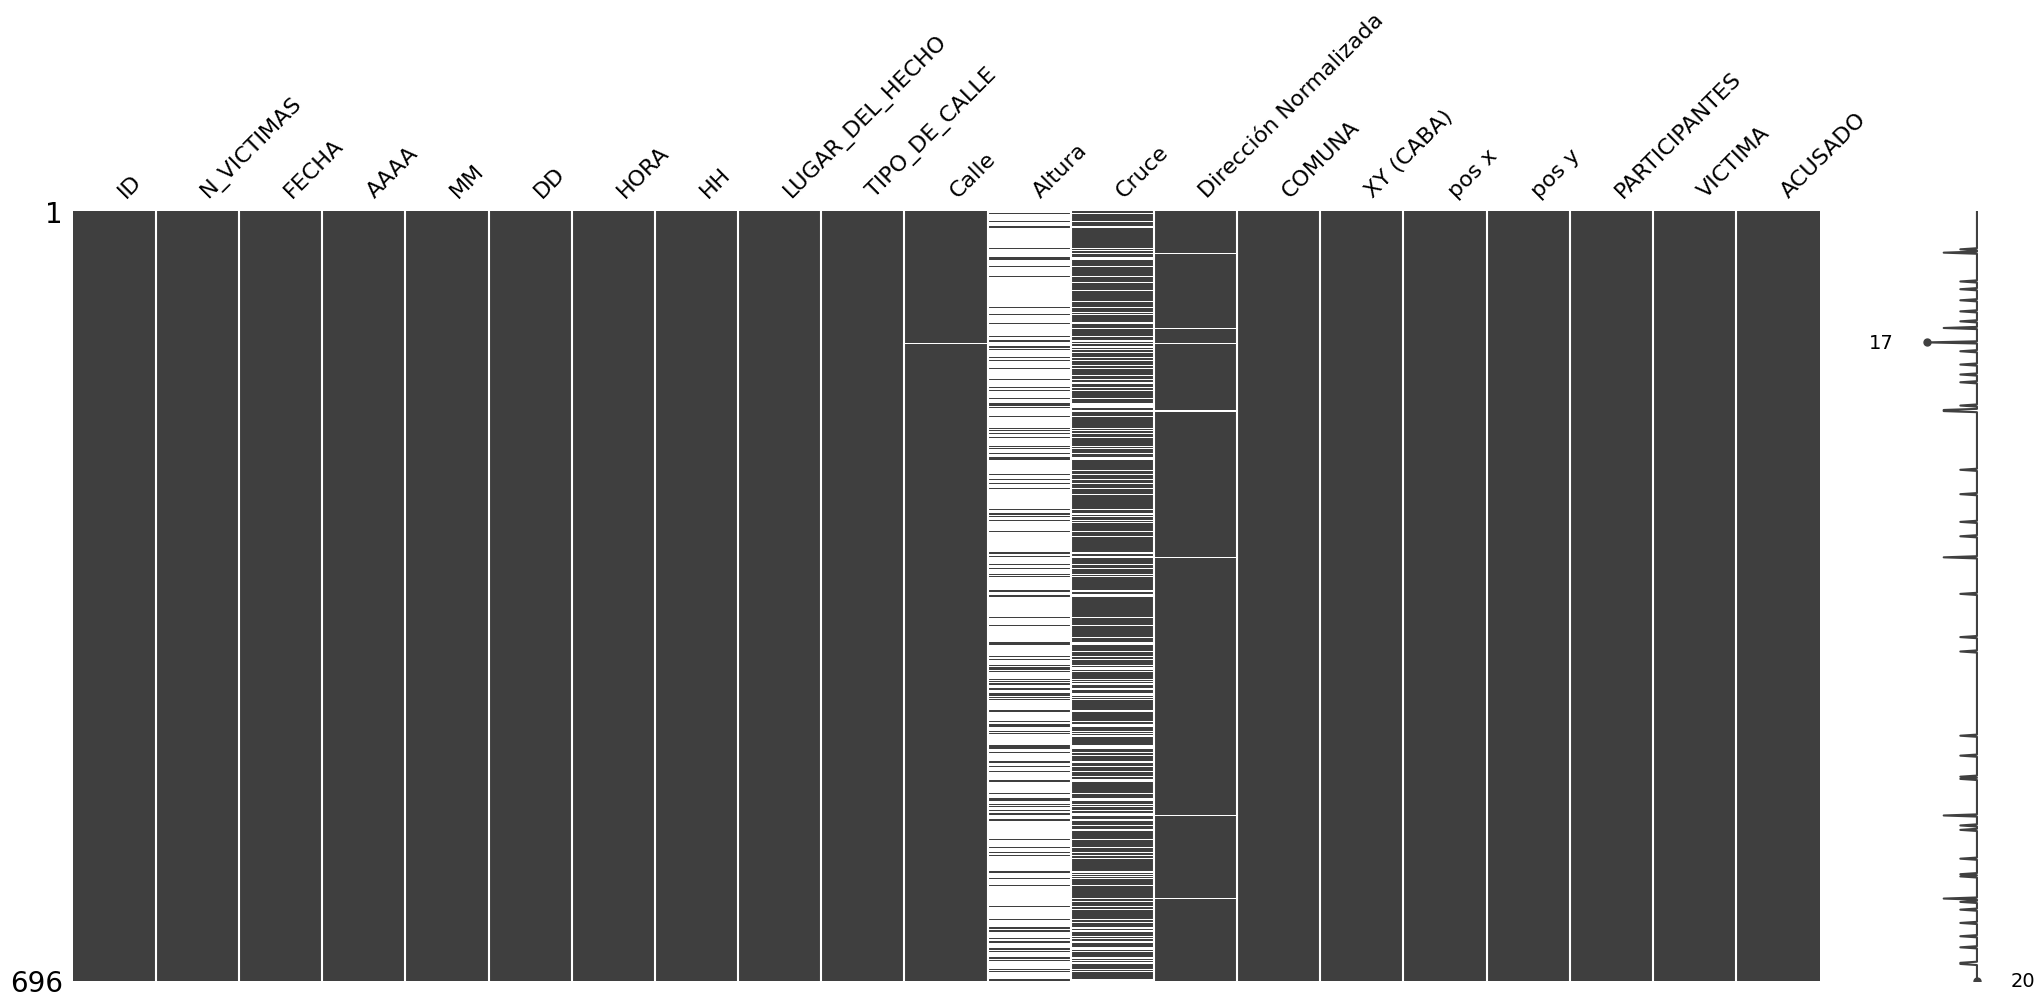

In [45]:
%matplotlib inline
msno.matrix(df1)

Vamos a eliminar todas las columnas que no considere totalemente necesaria para este trabajo. Hay algunas columnas que se repiten como son las columnas FECHA,AAAA,MM,DD que están en el otro dataframe

In [50]:
df1.drop(columns=['Altura','Cruce','Dirección Normalizada','XY (CABA)','FECHA','AAAA','MM','DD'],inplace=True)

Ahora vamos a proceder a limpiar todos los datos que sean "SD" ya que los considero nulos (Esto lo hice variante muchas lineas de código que basicamente era ver los uniques de cada columna como por ejemplo d = df1['TIPO_DE_CALLE'].unique()).

In [51]:
#Primero reemplazo el valor de "SD" a un valor np.nan para que luego sea más fácil de eliminar mediante el método de dropna()
df1.replace('SD',np.nan,inplace=True)

df1.dropna(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12564\1623704742.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace('SD',np.nan,inplace=True)


Como se puede observar no había muchos nulos (los sin datos o mejor conocido como "SD")

Vamos a realizar el ETL de df2

<Axes: >

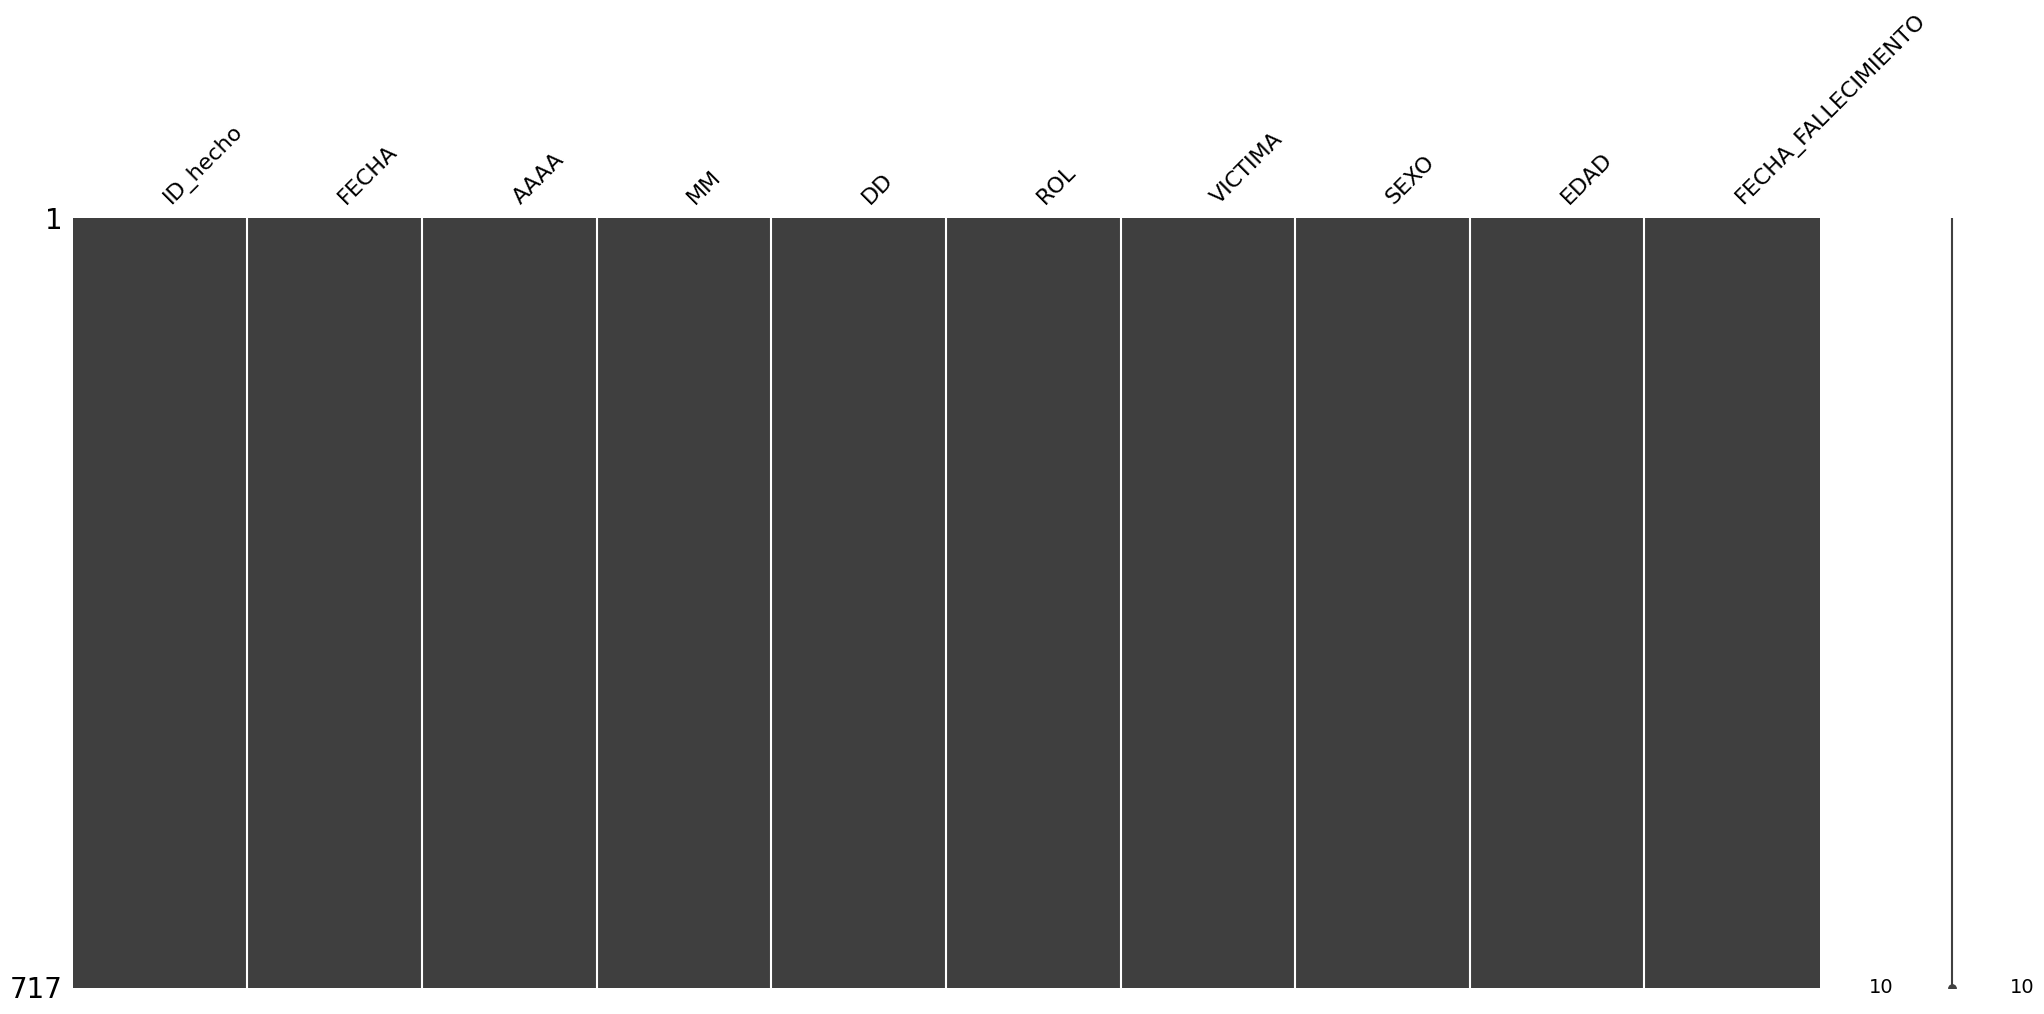

In [46]:
%matplotlib inline
msno.matrix(df2)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Al igual que en el df1, voy a limpiar los valores "SD"

In [61]:
#Primero reemplazo el valor de "SD" a un valor np.nan para que luego sea más fácil de eliminar mediante el método de dropna()
df2.replace('SD',np.nan,inplace=True)

df2.dropna(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12564\1282667472.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace('SD',np.nan,inplace=True)


In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             608 non-null    object        
 1   FECHA                608 non-null    datetime64[ns]
 2   AAAA                 608 non-null    int64         
 3   MM                   608 non-null    int64         
 4   DD                   608 non-null    int64         
 5   ROL                  608 non-null    object        
 6   VICTIMA              608 non-null    object        
 7   SEXO                 608 non-null    object        
 8   EDAD                 608 non-null    float64       
 9   FECHA_FALLECIMIENTO  608 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 52.2+ KB


Ahora voy a proceder a unir ambos dataframes, terminar de limpiar si es que hay algo más que limpiar y luego exportarlo para poder empezar a trabajar en power bi

In [63]:
df = pd.merge(df1,df2,left_on='ID',right_on='ID_hecho',how='inner')
df.set_index('ID',inplace=True)
pd.set_option('display.max_columns',None)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 2016-0001 to 2021-0097
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   N_VICTIMAS           598 non-null    int64         
 1   HORA                 598 non-null    object        
 2   HH                   598 non-null    float64       
 3   LUGAR_DEL_HECHO      598 non-null    object        
 4   TIPO_DE_CALLE        598 non-null    object        
 5   Calle                598 non-null    object        
 6   COMUNA               598 non-null    int64         
 7   pos x                598 non-null    object        
 8   pos y                598 non-null    object        
 9   PARTICIPANTES        598 non-null    object        
 10  VICTIMA_x            598 non-null    object        
 11  ACUSADO              598 non-null    object        
 12  ID_hecho             598 non-null    object        
 13  FECHA                598 n

Voy a proceder a terminar la limpieza. Primero voy a eliminar la columna de FECHA_FALLECIMIENTO porque no veo necesario honestamente trabajarlo y después normalizar columnas como lo es HORA,EDAD y FECHA (voy viendo si es necesario más en el camino)

In [66]:
#Dropeo la columna FECHA_FALLECIMIENTO
df.drop(columns=['FECHA_FALLECIMIENTO'],inplace=True)

In [74]:
#Convierto la columna EDAD en int64
df['EDAD'] = df['EDAD'].round().astype('int64')
#Ya que estoy conviertiendo a int64, aprovecho también de hacerlo
#en la columna de HH (era float64)
df['HH']= df['HH'].round().astype('int64')


In [75]:
#Transformamos la columna HORA a time
df['HORA']= pd.to_datetime(df['HORA'],format='%H:%M:%S').dt.time

In [77]:
#Agregamos una columna que se llame dia_semana para luego graficar 
#los días de la semana que más accidentes ocurren


df['dia_semana'] = df['FECHA'].dt.day_name()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 2016-0001 to 2021-0097
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   N_VICTIMAS       598 non-null    int64         
 1   HORA             598 non-null    object        
 2   HH               598 non-null    int64         
 3   LUGAR_DEL_HECHO  598 non-null    object        
 4   TIPO_DE_CALLE    598 non-null    object        
 5   Calle            598 non-null    object        
 6   COMUNA           598 non-null    int64         
 7   pos x            598 non-null    object        
 8   pos y            598 non-null    object        
 9   PARTICIPANTES    598 non-null    object        
 10  VICTIMA_x        598 non-null    object        
 11  ACUSADO          598 non-null    object        
 12  ID_hecho         598 non-null    object        
 13  FECHA            598 non-null    datetime64[ns]
 14  AAAA             598 non-null    

Acabo de ver que tengo VICTIMA_y e VICTIMA_x. Voy a eliminar uno de los dos ya que son lo mismo. De paso voy a renombrar algunas columnas (poner en minisculas) para un mejor orden

In [79]:
df.drop(columns=['VICTIMA_y'],inplace=True)

In [80]:
renombrar = {'N_VICTIMAS':'n_victimas','FECHA':'fecha','AAAA':'anio','MM':'mes','DD':'dia','HORA':'hora','HH':'franja_horaria','Calle':'calle','COMUNA':'comuna','pos x':'longitud','pos y':'latitud','PARTICIPANTES':'participantes','VICTIMA_x':'victima','SEXO':'sexo','EDAD':'edad','TIPO_DE_CALLE':'tipo_de_calle','LUGAR_DEL_HECHO':'lugar_del_hecho','PARTICIPANTES':'participantes','ACUSADO':'acusado','ROL':'rol'}

df = df.rename(columns=renombrar)
df.rename_axis('id_hecho',axis='index',inplace=True)
df.drop(columns='ID_hecho',inplace=True)

In [83]:
df['fecha'] = df['fecha'].astype(str)

Ahora vamos a proceder a exportar la base de datos en Excel

In [84]:
df.to_excel('C:/Users/User/OneDrive/Escritorio/Proyecto Final Accidente Vial/Datasets/df.xlsx')